# Description

Here we have comparisons between the model and real DNNs. The DNN-related results were produced using external open-source code, so we will simply load from saved results. See `README` for more details.

## Multifractal properties in loss landscape

<ipython-input-6-7132fe4bc3dc>:35: UserWarning: linewidths is ignored by contourf
  cf1 = ax1.contourf(X, Y, Z, colors=None, levels=np.arange(0, vmax, vlevels), linewidths=0.5, cmap='terrain', vmin=0, vmax=vmax, extend='max')


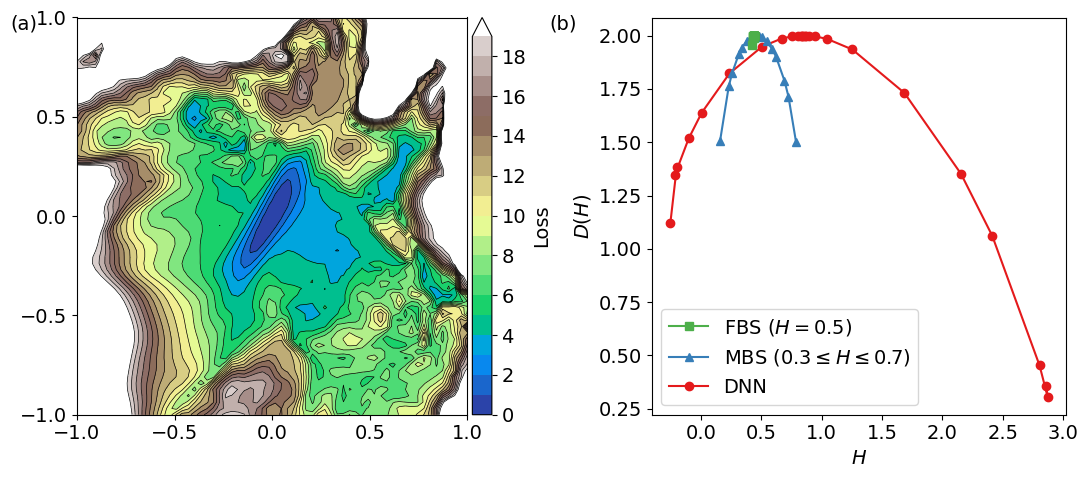

In [6]:
import matplotlib.pyplot as plt
from scipy.io import loadmat
import numpy as np 
import h5py
from mpl_toolkits.axes_grid1 import make_axes_locatable

BIGGER_SIZE = 14
SMALLER_SIZE = 12
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

fig, ax = plt.subplots(1,2, figsize=(11,5))
ax1, ax2 = ax

##### Landscape #####
import h5py

surf_file = "data/DNN/subspace.h5"

with h5py.File(surf_file, "r") as f:
    f = h5py.File(surf_file, 'r')
    x = np.array(f['xcoordinates'][:])
    y = np.array(f['ycoordinates'][:])
    X, Y = np.meshgrid(x, y)
    Z = np.array(f['train_loss'][:])

vmax = 20
vlevels = 1
ax1.contour(X, Y, Z, colors='black', levels=np.arange(0, vmax, vlevels), linewidths=0.5, vmin=0, vmax=vmax)
cf1 = ax1.contourf(X, Y, Z, colors=None, levels=np.arange(0, vmax, vlevels), linewidths=0.5, cmap='terrain', vmin=0, vmax=vmax, extend='max')
divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
cb = fig.colorbar(cf1, cax=cax, orientation='vertical')
cb.set_label('Loss')
# cb = ax1.colorbar()
# cb.set_label('Loss')
ax1.set_yticks([-1,-0.5,0,0.5,1])

##### Spectra #####
files = ["data/DNN/multifractal_spectrum.mat"\
    , "data/multifractional_brownian_surface/multifractal_spectrum.mat", "data/fractional_brownian_surfaces/H=0.5/multifractal_spectrum.mat"]
colors = ["#e41a1c","#377eb8", "#4daf4a"]
markers = ["o", "^", "s"]
labels = ["DNN", r"MBS ($0.3 \leq H \leq 0.7$)", r"FBS ($H=0.5$)"]

files.reverse()
colors.reverse()
markers.reverse()
labels.reverse()

zorders = [4,3,2,1]

for f,c,m,l, z in zip(files,colors,markers,labels, zorders):
    data = loadmat(f)
    Dq = data["Dq"].flatten()
    hq = data["hq"].flatten()
    ax2.plot(hq,Dq, marker=m, color=c, label=l, zorder=z)
ax2.set_xlabel(r"$H$")
ax2.set_ylabel(r"$D(H)$")
# ax2.set_ylim(ymin=0)
ax2.legend()

# Apperance
fig.subplots_adjust(wspace=-0.3, hspace=0)

# Subplot labels
fig.text(0.01, 0.92, '(a)')
fig.text(0.50, 0.92, '(b)')

fig.tight_layout()
fig.savefig("figures/loss_landscape.pdf", dpi=600, bbox_inches='tight')
plt.show()

## TAMSD

Windowsize = 1000


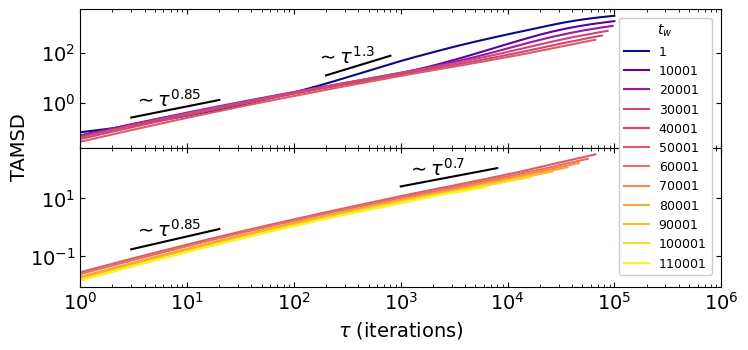

In [8]:
# Import packages
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt

# Plot configurations
SMALLER_SIZE = 12
BIGGER_SIZE = 14

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALLER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# Path to directory with tamsd mat files
path = "data/DNN/msd/"

# Load TAMSD data from each file and save in correct format for use with msd_tools
waiting_times = []
windowsizes = set()
xs = []
ys = []
for filename in os.listdir(path):
    _, file_extension = os.path.splitext(filename)
    if file_extension != '.mat':
        continue
    data_tmp = loadmat(path + filename)
    tw_tmp = data_tmp["waiting_time"]
    waiting_times.append( tw_tmp.flatten()[0] )
    windowsize_tmp = data_tmp["windowsize"]
    windowsizes.add( windowsize_tmp.flatten()[0] )
    tau_msd = data_tmp["tau_msd"]
    xs.append( list(tau_msd[:,0].flatten()) )
    ys.append( list(tau_msd[:,1].flatten()) )
# Arrange curves in ascending order of waiting time
waiting_times, xs, ys = (list(t) for t in zip(*sorted(zip(waiting_times, xs, ys))))

# Print windowsize
if len(windowsizes) == 1:
    for w in windowsizes:
        print("Windowsize = " + str(w))
else:
    print("Friendly reminder that windowsize is not constant for these curves. They are:")
    for w in windowsizes:
        print("Windowsize = " + str(w))

# Colour map
transition = 5
nlines = 12 
cmap = plt.get_cmap("plasma")
regime1 = np.linspace(0,0.5,transition-1,endpoint=True)
regime2 = np.linspace(0.5, 1, nlines-transition+1, endpoint=True)
colors = [cmap(i) for i in regime1] + [cmap(i) for i in regime2]
# Figure
fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(8.27,3.6)) # for report 
ax1, ax2 = ax 
# Plot
for i in range(len(waiting_times)):
    if i < transition:
        ax1.loglog(xs[i], ys[i], c=colors[i], label=str(waiting_times[i]))
    elif i > transition:
        ax2.loglog(xs[i], ys[i], c=colors[i], label=str(waiting_times[i]))
    else:
        ax1.loglog(xs[i], ys[i], c=colors[i], label=str(waiting_times[i]))
        ax2.loglog(xs[i], ys[i], c=colors[i])
# Eye guides
X = np.array([3,20])
Y = X**0.85/10
ax1.plot(X,Y, 'k')
fig.text(0.19, 0.61, r'$\sim \tau^{0.85}$')
Y = X**0.85/15
ax2.plot(X,Y, 'k')
fig.text(0.19, 0.25, r'$\sim \tau^{0.85}$')
X = np.array([200,800])
Y = X**1.3/80
fig.text(0.41, 0.73, r'$\sim \tau^{1.3}$')
ax1.plot(X,Y, 'k')
X = np.array([1e3,8e3])
Y = X**0.7/5
ax2.plot(X,Y, 'k')
fig.text(0.52, 0.42, r'$\sim \tau^{0.7}$')
# Legend
lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
legend = fig.legend(lines, labels, loc=5, bbox_to_anchor=(0.896,0.5), framealpha=1, title=r"$t_w$", fontsize=9)
plt.setp(legend.get_title(),fontsize=10)
# Appearance
plt.subplots_adjust(wspace=0, hspace=0)
ax1.tick_params(axis="both",which="both",direction="in", top=True, right=True)
ax2.tick_params(axis="both",which="both",direction="in", top=True, right=True)
ax1.set_xlim([1,1e6])
ax2.set_xlim([1,1e6])
ax2.set_xlabel(r"$\tau$ (iterations)")
fig.text(0.04, 0.5, 'TAMSD', va='center', rotation='vertical')
plt.show()
fig.savefig("figures/TAMSD_DNN.pdf", dpi=600, bbox_inches='tight')

## Hessian eigenvalues

<ipython-input-13-f65430b5bb3c>:109: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


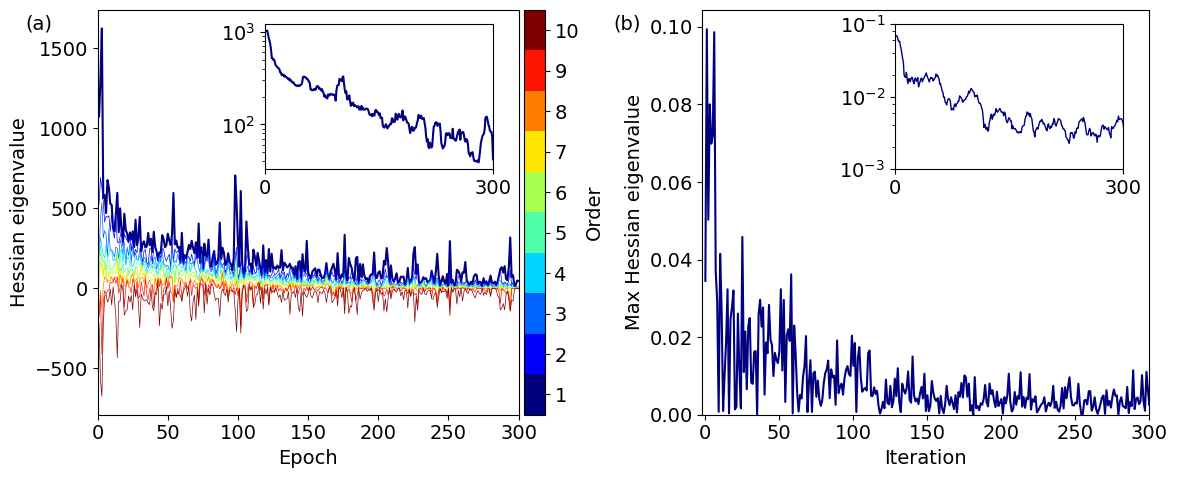

In [13]:
import matplotlib.pyplot as plt
import matplotlib
from scipy.io import loadmat
from scipy.ndimage.filters import uniform_filter
from scipy import interpolate
import numpy as np 
from multifractal_gd.hessian_tools import hessian, diagonalise_hessian

BIGGER_SIZE = 14
SMALLER_SIZE = 12
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

fig, ax = plt.subplots(1,2, figsize=(12,5))
ax1, ax2 = ax

##### DNN #####
data = loadmat("data/DNN/eigenvalues.mat")
eigenvalues = data["eigenvalues"]
epochs = data["epochs"].flatten()

n = eigenvalues.shape[1]
cmap = plt.get_cmap("jet", n)
for i in range(n):
    eigs = eigenvalues[:, i]
    c = cmap(i)
    if i == 0:
        linewidth = 1.5
    else:
        linewidth = 0.5
    ax1.plot(epochs, eigs, c=c, linewidth=linewidth)
norm = matplotlib.colors.BoundaryNorm(np.arange(1, n+2)-0.5, n)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
# plt.colorbar(sm, ax=ax1, ticks=np.arange(1, n+1), label='Order')
cb = fig.colorbar(sm, cax=cax, orientation='vertical', ticks=np.arange(1, n+1), label='Order')
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Hessian eigenvalue")
ax1.set_xlim([0,300])

left, bottom, width, height = [0.23, 0.64, 0.19, 0.29]
ax3 = fig.add_axes([left, bottom, width, height])
top_eig = eigenvalues[:,0]
top_eig = uniform_filter(top_eig, size=10)
cmap = plt.get_cmap("jet", n)
c = cmap(0)
ax3.semilogy(epochs, top_eig, c=c, linewidth=1.5)
ax3.set_xlim([0,300])
ax3.set_xticks([0,300], [0,300])


##### Model #####
landscape = loadmat("data/multifractional_brownian_surface/landscape.mat")["landscape"] # load landscape
# load reserved trajectory to prevent changes
trajectory = loadmat("data/multifractional_brownian_surface/trajectory_reserved.mat")["trajectory"] 

hess = hessian(landscape) # calculate hessian at each point
eigenvalues = diagonalise_hessian(hess) # Calculate eigenvalues at each point
max_eig = np.squeeze(eigenvalues[:,1,:,:]) # Maximum eigenvalues at each point
# Find max eigenvalue at each point in trajectory by linear interpolation
max_eig_traj = []
time = np.arange(10000)
f = interpolate.interp2d(np.arange(max_eig.shape[0]), np.arange(
    max_eig.shape[1]), max_eig, kind='linear') # function for linear interpolation
for i in time:
    x,y = trajectory[i,:]
    max_eig_traj.append( f(x,y) )
# Plot magnitude of maximum eigenvalue, smoothed with window=3, over time 
X = time 
Xmax = 300
Y = np.abs(np.array(max_eig_traj)).flatten()
cmap = plt.get_cmap("jet", 10)
c = cmap(0)
ax2.plot(X, Y, c=c, linewidth=1.5)
ax2.set_ylabel("Max Hessian eigenvalue")
ax2.set_xlabel("Iteration")
ax2.set_xlim([-2,Xmax])
ax2.set_ylim(ymin=0)

Y = uniform_filter(Y, size=10)
left, bottom, width, height = [0.755, 0.64, 0.19, 0.29]
ax4 = fig.add_axes([left, bottom, width, height])
top_eig = eigenvalues[:,0]
ax4.semilogy(X, Y, c=c, linewidth=1)
ax4.set_xlim([0,Xmax])
ax4.set_xticks([0,Xmax], [0,Xmax])
ax4.set_ylim([1e-3,1e-1])
locmaj = matplotlib.ticker.LogLocator(base=10,numticks=5) 
ax4.yaxis.set_major_locator(locmaj)
locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=12)
ax4.yaxis.set_minor_locator(locmin)
ax4.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())


# Apperance
fig.subplots_adjust(wspace=-0.3, hspace=0)

# Subplot labels
fig.text(0.03, 0.92, '(a)')
fig.text(0.52, 0.92, '(b)')

fig.tight_layout()
fig.savefig("figures/hessian_eigenvalue_both.pdf", dpi=600, bbox_inches='tight')
plt.show()